In [63]:
import pandas as pd
import numpy as np
df=pd.read_csv("cereal.csv")
#df.info()
#df.isnull().sum()/len(df)
#found no null values
#df.info()
#df["name"]
#df["name"].unique()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target=["rating"]
cat_col=["name","mfr","type"]
num_col=["calories","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins","shelf",
        "weight","cups"]
#Applying onehotencoding for object type columns
def create_ohe(df,col):
    le=LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe=OneHotEncoder(sparse=False)
    column_names=[col+"_"+str(i) for i in le.classes_]
    return (pd.DataFrame(ohe.fit_transform(a),columns=column_names))
temp=df[num_col]
for column in cat_col:
    temp_def=create_ohe(df,column)
    temp=pd.concat([temp,temp_def],axis=1)
    
    
#temp.info()
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#standardizing input values
x_train,x_test,y_train,y_test=train_test_split(temp,df["rating"],random_state=2019,test_size=0.3)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,random_state=2019,test_size=0.1)
scaler.fit(x_train)
x_tr_s=scaler.transform(x_train)
scaler.fit(x_test)
x_te_s=scaler.transform(x_test)
scaler.fit(x_val)
x_v_s=scaler.transform(x_val)
#print(len(x_tr_s))
#print(len(x_te_s))
#print(x_train.shape)
history=History()
model=Sequential()
model.add(Dense(550,input_dim=98,activation="relu"))
model.add(Dense(550,activation="relu"))
model.add(Dense(550,activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(optimizer="adam",loss="mean_absolute_error",metrics=["mean_absolute_error"])
model.fit(x_tr_s,y_train,validation_data=(x_v_s,y_val),epochs=10,batch_size=64,callbacks=[history])
mean=y_train.mean()
a=abs(y_test-mean).mean()
result=model.evaluate(x_te_s,y_test)
print(result)
print("The base_line value  :",a)



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a L

Train on 47 samples, validate on 6 samples
Epoch 1/10
47/47 [==============================] - 4s 75ms/step - loss: 39.4184 - mean_absolute_error: 39.4184 - val_loss: 47.0022 - val_mean_absolute_error: 47.0022
Epoch 2/10
47/47 [==============================] - 0s 887us/step - loss: 38.1762 - mean_absolute_error: 38.1762 - val_loss: 46.1209 - val_mean_absolute_error: 46.1209
Epoch 3/10
47/47 [==============================] - 0s 785us/step - loss: 36.6138 - mean_absolute_error: 36.6138 - val_loss: 44.9485 - val_mean_absolute_error: 44.9485
Epoch 4/10
47/47 [==============================] - 0s 677us/step - loss: 34.5261 - mean_absolute_error: 34.5261 - val_loss: 43.3714 - val_mean_absolute_error: 43.3714
Epoch 5/10
47/47 [==============================] - 0s 621us/step - loss: 31.6787 - mean_absolute_error: 31.6787 - val_loss: 41.2517 - val_mean_absolute_error: 41.2517
Epoch 6/10
47/47 [==============================] - 0s 722us/step - loss: 27.8027 - mean_absolute_error: 27.8027 - val

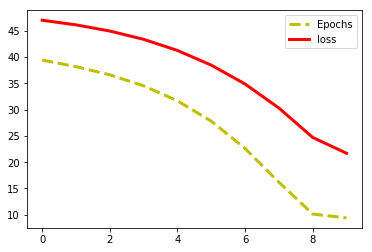

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
#adding some styles to the graph
plt.plot(history.history['loss'],'y--',label="Epochs",linewidth=3)
plt.plot(history.history['val_loss'],'r',label="loss",linewidth=3)
plt.legend()